In [2]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
#from testing_preprocessing import dataset

# Load the saved XGBoost model from JSON file
model = xgb.Booster()
model.load_model('xgboost_model.json')
print("Loaded XGBoost model from 'xgboost_model.json'.")


Loaded XGBoost model from 'xgboost_model.json'.


In [3]:
# using the preprocessed data
from data_reprocessing import test_to_df
dataset = 'new_test.csv'  
test_data = test_to_df(dataset)

# Display the first few rows of the dataset to verify the preprocessing
print(test_data.head())


       ip  app  device  os  channel  is_attributed  day  hour  minute  second
0    9224   12       1  13      140              0    7    11      13      45
1   74306   12       1  13      265              0    9     1      28       3
2  228630    3       1   9      205              0    9    12      39       1
3   49582   12       2  13      178              0    9     6      53       7
4   71458   15       1  19      245              0    7     6      54      58


In [4]:
# Separate features and labels from the test data
X_test = test_data.drop(columns=['is_attributed'])  # Features
y_test = test_data['is_attributed']  # True labels

# Convert the test set to DMatrix format for XGBoost
dtest = xgb.DMatrix(X_test)

# Make predictions on the test set using the loaded model
y_test_pred_prob = model.predict(dtest)

# Convert probabilities to binary class predictions (0 = fraudulent, 1 = non-fraudulent)
y_test_pred_class = (y_test_pred_prob > 0.5).astype(int)


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate performance metrics on the test set
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class, pos_label=0)  # 0 = fraudulent
recall = recall_score(y_test, y_test_pred_class, pos_label=0)  # 0 = fraudulent
f1 = f1_score(y_test, y_test_pred_class, pos_label=0)  # 0 = fraudulent
auc_roc = roc_auc_score(y_test, y_test_pred_prob)

# Display evaluation results
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Test Set Precision (fraud detection): {precision:.4f}")
print(f"Test Set Recall (fraud detection): {recall:.4f}")
print(f"Test Set F1-Score (fraud detection): {f1:.4f}")
print(f"Test Set AUC-ROC: {auc_roc:.4f}")


Test Set Accuracy: 0.9960
Test Set Precision (fraud detection): 0.9992
Test Set Recall (fraud detection): 0.9968
Test Set F1-Score (fraud detection): 0.9980
Test Set AUC-ROC: 0.9693


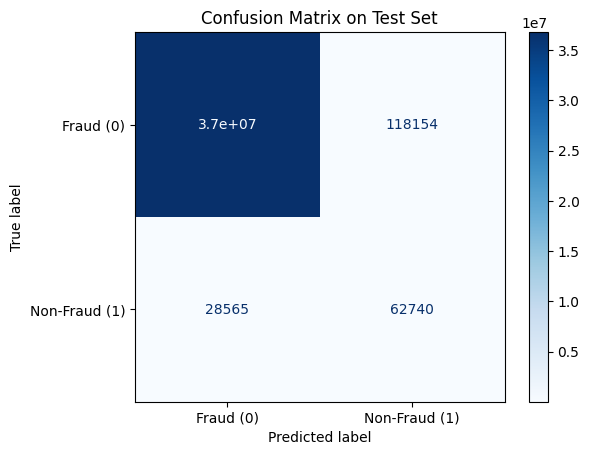

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud (0)', 'Non-Fraud (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.show()
